In [7]:
import numpy as np
import os
from glob import glob
import ase, ase.io
import matplotlib.pyplot as plt

In [8]:
class CastepBands:
    def __init__(self, atoms_in, bands_file: str) :
        self.bands_file_name = bands_file
        with open(bands_file) as f:
            self.whole_bands_file = f.readlines()
        #self.whole_bands_file = !less $bands_file
        self.number_of_atoms = len(atoms_in)
        self.get_branches()
    def get_branches(self):
        loc=[] ; kpath=[] ; branch=[] ; ordering=[]
        for i, val in enumerate(self.whole_bands_file):
            if 'Spin' in val: loc.append(i)
        for i, val in enumerate(loc):
            kpath.append(self.whole_bands_file[val-1].split()[2:5])
            ordering.append(int(self.whole_bands_file[val-1].split()[1]))
        for i, j in zip(loc[0:-1], loc[1:]):
            branch.append(np.array(self.whole_bands_file[i+1:j-1], dtype=float))
        branch.append(np.array(self.whole_bands_file[loc[-1]+1:], dtype=float))
        branch=np.array(branch)
        kpath=np.array(kpath)
        branch_order = np.zeros(branch.shape)
        kpath_order = np.zeros(kpath.shape)
        for i, val in enumerate(ordering):
            branch_order[val-1,:] = branch[i,:] #-1 to get indexing to start from 0
            kpath_order[val-1,:] = kpath[i,:]
        self.kpath = kpath_order ; self.branch = branch_order

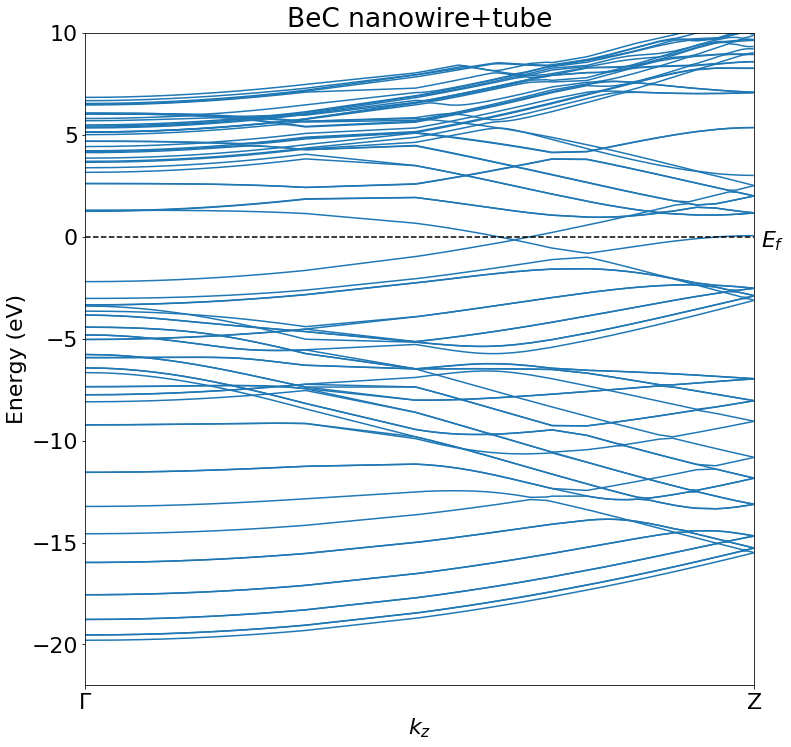

In [11]:
atoms = ase.io.read('/home/physics/phspnt/Reprohack_2022/CASTEP/geom_opti/BeC_tube+wire.geom')
A = CastepBands(atoms,'geom_opti/BeC_tube+wire.bands')
# %matplotlib inline
plt.plot(A.kpath[:,2], (A.branch - -0.065291)*ase.units.Ha, '-', color='C0')
plt.xlim([0,max(A.kpath[:,2])])
plt.xlabel('$k_{z}$')
plt.ylabel('Energy (eV)')
plt.axhline(0,color='k', linestyle='--')
plt.ylim([-21,15])
plt.title('BeC nanowire+tube')
plt.xticks([0,0.5], [r"$\Gamma$", "Z"])

plt.text(0.505, -0.5, r'$E_{f}$')
plt.ylim([-22,10])
plt.rcParams["figure.figsize"] =12,12
plt.rcParams.update({'font.size': 22})

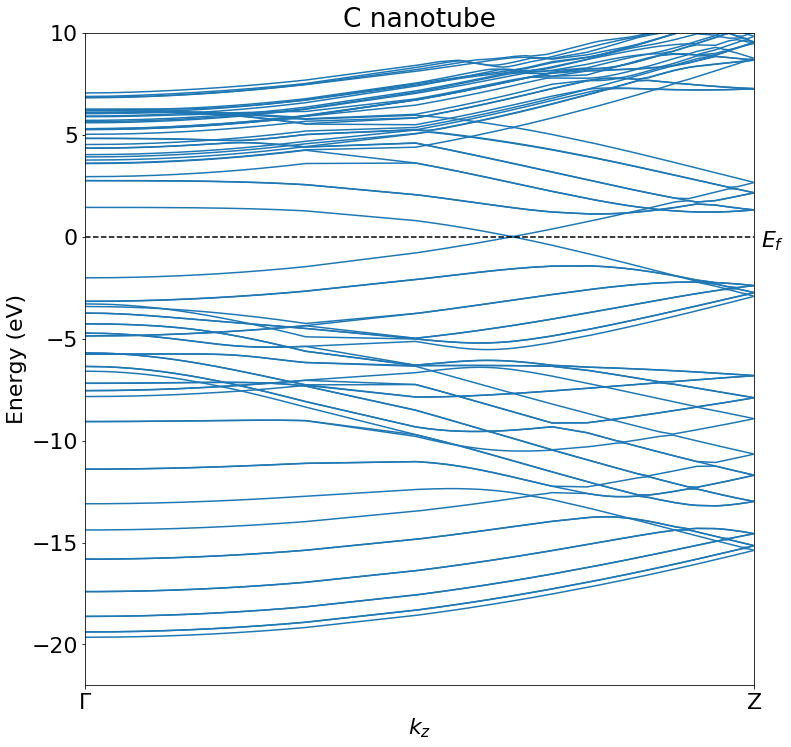

In [12]:
atoms = ase.io.read('/home/physics/phspnt/Reprohack_2022/CASTEP/geom_opti/C_nanotube.geom')
A = CastepBands(atoms,'geom_opti/C_nanotube.bands')
# %matplotlib notebook
plt.plot(A.kpath[:,2], (A.branch- -0.074544)*ase.units.Ha, '-', color='C0')
plt.xlim([0,max(A.kpath[:,2])])
plt.xlabel('$k_{z}$')
plt.ylabel('Energy (eV)')
plt.axhline(0,color='k', linestyle='--')
plt.ylim([-21,15])
plt.title('C nanotube')
plt.xticks([0,0.5], [r"$\Gamma$", "Z"])
plt.text(0.505, -0.5, r'$E_{f}$')

plt.ylim([-22,10])
plt.rcParams["figure.figsize"] =12,12
plt.rcParams.update({'font.size': 22})

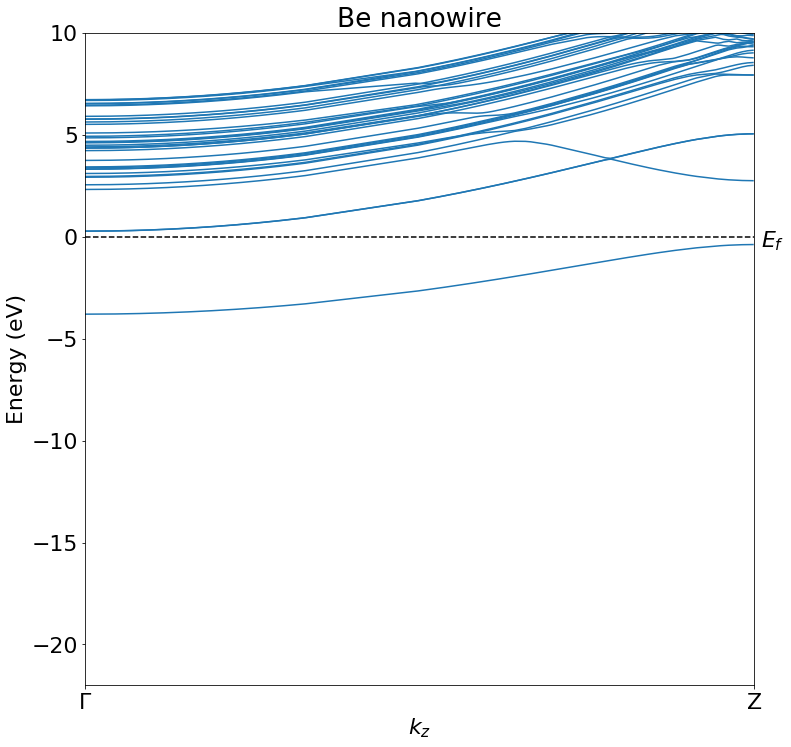

In [13]:
atoms = ase.io.read('/home/physics/phspnt/Reprohack_2022/CASTEP/geom_opti/Be_nanowire.geom')
A = CastepBands(atoms,'geom_opti/Be_nanowire.bands')
# %matplotlib notebook
plt.plot(A.kpath[:,2], (A.branch - -0.102637)*ase.units.Ha, '-', color='C0')
plt.xlim([0,max(A.kpath[:,2])])
plt.xlabel('$k_{z}$')
plt.ylabel('Energy (eV)')
plt.axhline(0,color='k', linestyle='--')
plt.ylim([-21,15])
plt.title('Be nanowire')
plt.xticks([0,0.5], [r"$\Gamma$", "Z"])
plt.text(0.505, -0.5, r'$E_{f}$')

plt.ylim([-22,10])
plt.rcParams["figure.figsize"] =12,12
plt.rcParams.update({'font.size': 22})

In [29]:
bands_file = 'BeC_tube+wire_0800ev.bands'
test= !less $bands_file

with open('BeC_tube+wire_0800ev.bands') as f:
    lines = f.readlines()

test?

In [30]:
lines?

3.6.6
